# Predicting Survival on the Titanic (Classification)

## Import Libraries

### Standard Libraries

In [1]:
#Data analysis libraries 
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

#ignore warnings

### Additional Libraries

In [27]:
#Train Test Split
from sklearn.model_selection import train_test_split
#KNN
from sklearn.neighbors import KNeighborsClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn import tree, metrics
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Accuracy Score Metric
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Cross validation
from sklearn.model_selection import cross_val_score

## Load and Explore the Dataset

In [3]:
df = pd.read_csv('Titanic_Clean.csv')

### Inspect  Data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,1,0,3,0,1,0,1,1,4,1
1,2,1,1,1,1,0,2,3,6,4
2,3,1,3,1,0,0,1,2,5,2
3,4,1,1,1,1,0,1,3,5,4
4,5,0,3,0,0,0,1,1,5,2


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,0.523008,0.381594,1.361392,1.751964,4.636364,2.497194
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,0.635673,1.112838,1.353390,1.118156
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.500000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,2.000000,6.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,3.000000,6.000000,7.000000,4.000000


## Prepare Train and Test data

### Separate y (target) from x (predictor) columns


In [15]:
x = df.drop(["PassengerId","SibSp","Parch","Embarked","Survived"], axis=1)
y = df["Survived"]

### Split into train and test partitions using the train_test_split function


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=20)

## Build and Validate Models

### 1. KNN (k-Nearest Neighbors)

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       123
           1       0.77      0.68      0.72        74

   micro avg       0.80      0.80      0.80       197
   macro avg       0.79      0.78      0.78       197
weighted avg       0.80      0.80      0.80       197




Text(0.5,23.5,'Predicted label')

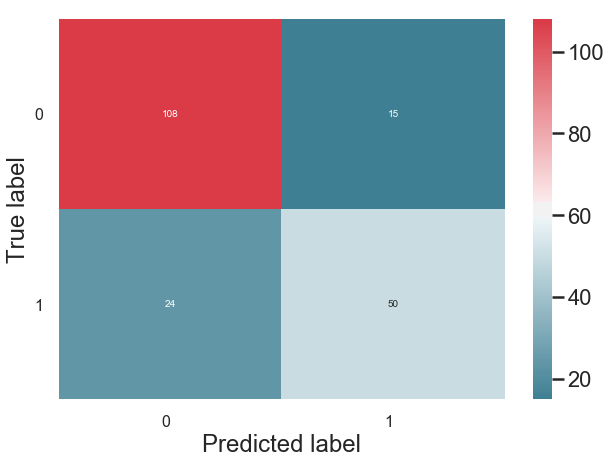

In [21]:
#Build Model using default parameters

#Set the value of K (default is 5)
k = 5
#Instatiate the model
knn = KNeighborsClassifier(n_neighbors=k)
#Fit the model to the training set
knn.fit(x_train,y_train)

#Print Accuracy Score on Test Set
y_pred = knn.predict(x_test)
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, y_pred)))

#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2. Logistic Regression

In [25]:
#Build Model using default parameters
#Instantiate the Algorithm. It is important to balance the set if the distribution is unequal  
logreg = LogisticRegression(C=10, class_weight="balanced", solver='liblinear', random_state=25)

#Train/Fit the model
logreg.fit(x_train, y_train)

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=25,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
#Print Accuracy Score on Test Set
print(logreg.coef_)

[[-1.12490774  2.31839271  0.20762854 -0.30846372 -0.00491428]]


### 3. Gaussian Naive Bayes

In [32]:
#Build Model using default parameters
#Instantiate the Algorithm 
gnb = GaussianNB()

#Train the model
gnb.fit(x_train,y_train)

#Predict on the Test Set
y_pred = gnb.predict(x_test)
print(y_pred)

#Print Accuracy Score on Test Set
print(accuracy_score(y_test,y_pred))

[1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 1 1 1 0 1 1]
0.8121827411167513


### 4. Decision Tree

In [34]:
#Build Model using default parameters
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=12)

#Train the model
clf.fit(x_train,y_train)

#Make predictions on the model
y_pred = clf.predict(x_test)

#Print Accuracy Score on Test Set
print("{:.2f}".format(metrics.accuracy_score(y_test,y_pred)))

0.82


In [35]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels, columns=labels)
cm_df

,1,0
1,114,9
0,27,47
